# Principle Component Analysis

In [23]:
# Feature Selection - Multi Linear Regression 
# Feature Extraction - PCA , LDA, Kernel PCA

# LDA and PCA for Linear Models, Kernel PCA for Non-LInear Models

# From the m independent Vraibles of your dataset, PCA Extracts p<= m new indepenedent Variable that explain the most Variance of the dataset regardless of the dependent variable

In [1]:
# Import Libraries

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('Wine.csv')
dataset.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [3]:
# Identify the shape of the dataset
dataset.shape

(178, 14)

In [4]:
# Identify the shape of the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
Alcohol                 178 non-null float64
Malic_Acid              178 non-null float64
Ash                     178 non-null float64
Ash_Alcanity            178 non-null float64
Magnesium               178 non-null int64
Total_Phenols           178 non-null float64
Flavanoids              178 non-null float64
Nonflavanoid_Phenols    178 non-null float64
Proanthocyanins         178 non-null float64
Color_Intensity         178 non-null float64
Hue                     178 non-null float64
OD280                   178 non-null float64
Proline                 178 non-null int64
Customer_Segment        178 non-null int64
dtypes: float64(11), int64(3)
memory usage: 19.5 KB


In [5]:
# Find Mising Value
dataset.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
Customer_Segment        0
dtype: int64

In [6]:
# Set the Independent Variable (X) and dependent variable (y) = f(x)=y
## Make sure always X is matrix and Y is vector
X = dataset.iloc[:, 0:13].values
y = dataset.iloc[:, 13].values

In [7]:
# Split the dataset into Training set and Testing Set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [8]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [9]:
# Apply PCA Principal Component Analysis  (Its Unsupervised Model)
from sklearn.decomposition import PCA
pca = PCA(n_components = 2) # Select None to understand the variance of all indepenedent variable
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_

In [10]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [11]:
# Predict the test_set results
y_predict = classifier.predict(X_test)
y_predict

array([1, 3, 2, 1, 2, 1, 1, 3, 2, 2, 3, 3, 1, 2, 3, 2, 1, 1, 2, 1, 2, 1, 1,
       2, 2, 2, 2, 2, 2, 3, 1, 1, 2, 1, 1, 1], dtype=int64)

In [12]:
# Evaluate the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_results = confusion_matrix(y_test,y_predict)

In [13]:
cm_results

array([[14,  0,  0],
       [ 1, 15,  0],
       [ 0,  0,  6]], dtype=int64)

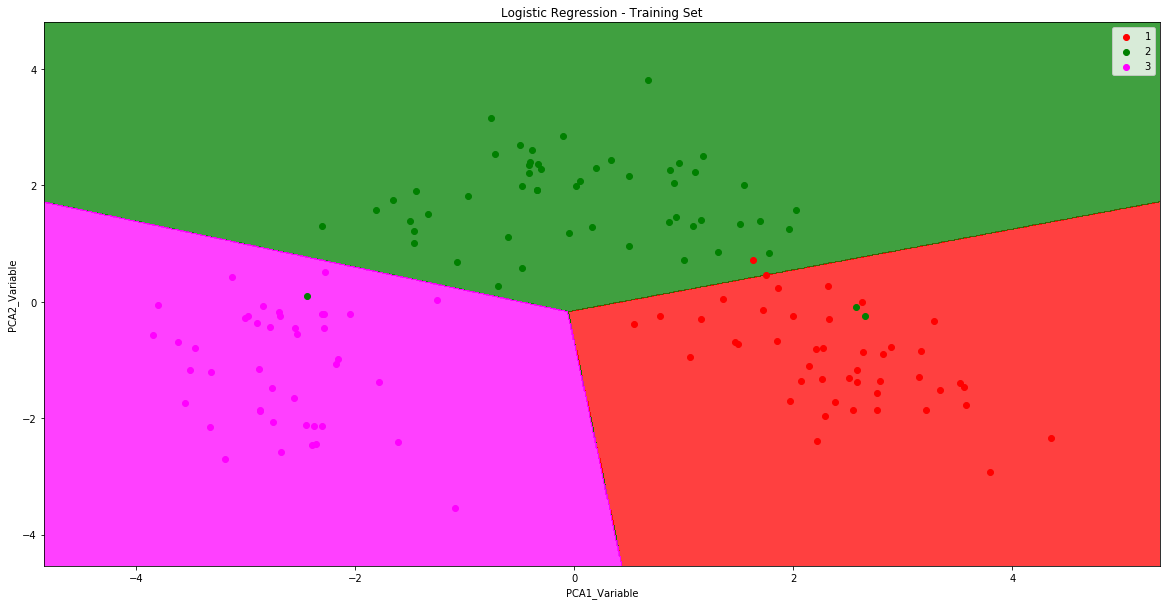

In [26]:
# Visualize the Testing dataset Result
# Import the Color Map class
from matplotlib.colors import ListedColormap

# Training Dataset
X_set,y_set = X_train, y_train

# set the plot figsize
plt.figure(figsize=(20,10))


# Prepare the grid by collect the pixel points and put it in the frame
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))


# Contour function will create a linear line between red and green
# Use predict function to predict the 0 or 1.If predict as 0 it will colorised as red or else it will green
plt.contourf(X1,X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
            alpha = 0.75, cmap = ListedColormap(('red','green','magenta')))

# Create a limit of estimate salary
plt.ylim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())


# Create a scatter plot
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set ==j, 0] , X_set[y_set ==j, 1], c = ListedColormap(('red','green','magenta'))(i), label = j)
    
plt.title("Logistic Regression - Training Set")
plt.xlabel("PCA1_Variable")
plt.ylabel("PCA2_Variable")
plt.legend()
plt.show()


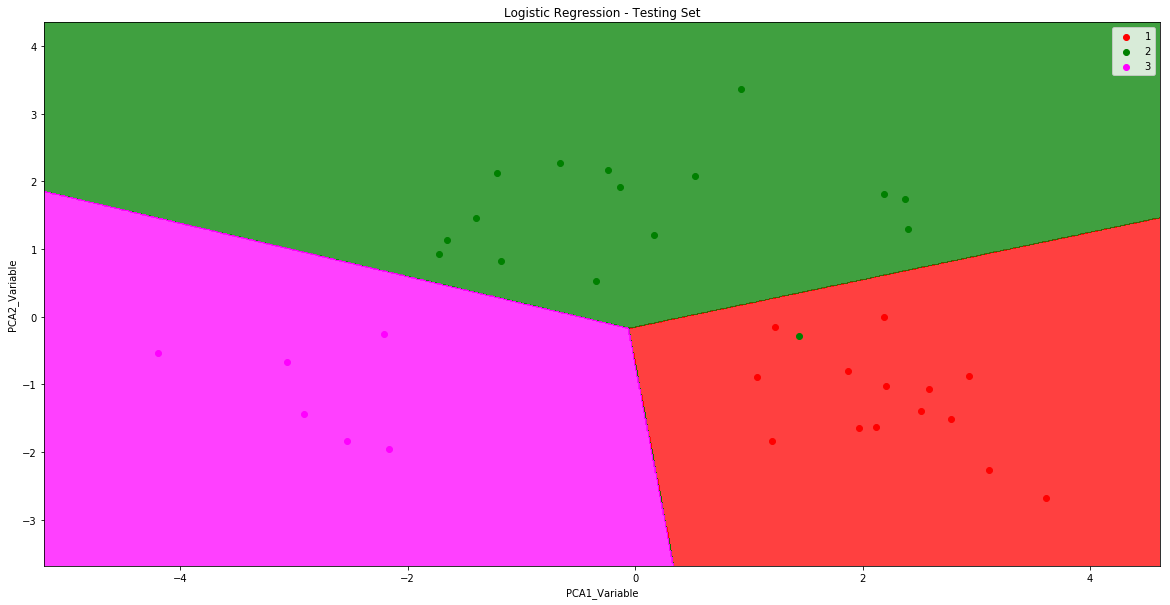

In [27]:
# Visualize the Testing dataset Result
# Import the Color Map class
from matplotlib.colors import ListedColormap

# Training Dataset
X_set,y_set = X_test, y_test

# set the plot figsize
plt.figure(figsize=(20,10))


# Prepare the grid by collect the pixel points and put it in the frame
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))


# Contour function will create a linear line between red and green
# Use predict function to predict the 0 or 1.If predict as 0 it will colorised as red or else it will green
plt.contourf(X1,X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
            alpha = 0.75, cmap = ListedColormap(('red','green','magenta')))

# Create a limit of estimate salary
plt.ylim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())


# Create a scatter plot
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set ==j, 0] , X_set[y_set ==j, 1], c = ListedColormap(('red','green','magenta'))(i), label = j)
    
plt.title("Logistic Regression - Testing Set")
plt.xlabel("Age")
plt.xlabel("Estimated Salary")
plt.xlabel("PCA1_Variable")
plt.ylabel("PCA2_Variable")
plt.legend()
plt.show()

In [18]:
print (cm_results)

[[14  0  0]
 [ 1 15  0]
 [ 0  0  6]]


In [19]:
#https://www.kaggle.com/grfiv4/plot-a-confusion-matrix
import itertools
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

In [20]:
cm_results

array([[14,  0,  0],
       [ 1, 15,  0],
       [ 0,  0,  6]], dtype=int64)

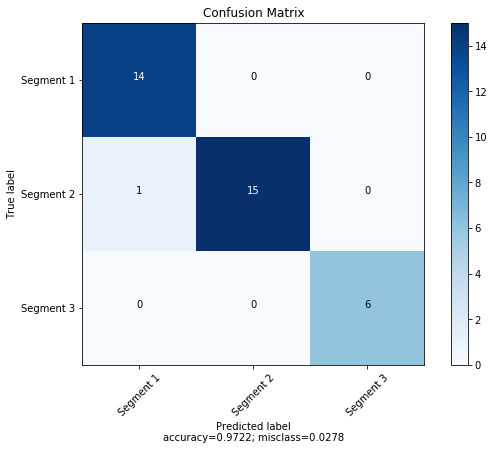

In [21]:
plot_confusion_matrix(cm           = cm_results, 
                      normalize    = False,
                      target_names = ['Segment 1', 'Segment 2', 'Segment 3'],
                      title        = "Confusion Matrix")